# Graph-tool

Graph-tool is a python library written in python and C++, making it faster than the other more popular libraries, inlcuding networkx.

In this homework we are going to learn the basics of graph-tool. For reference, please go to the official website of graph-tool to get you started:

https://graph-tool.skewed.de/static/doc/index.html

In order to install graph-tool I recommend using `python3.8` or lower as it seems to have problems with `python3.9` unfortunately. Install using `conda` is preffered using the following command in the terminal (Mac and Linux) or the conda terminal (windows):

`conda install -c conda-forge graph-tool`

Más instrucciones de instalación aquí:

https://git.skewed.de/count0/graph-tool/-/wikis/installation-instructions

## Making a simple network

Graph and network will be used intercheangably.

Please do the following:

0. Import graph-tool with the statement `import graph_tool.all as gt`
1. Create an empy directed graph `g`.
2. Add nodes `u`, `v`, and `w` to `g`.
3. Add an arc (directed edge) `e` from `u` to `v` and `f` from `v` to `u`.
4. Draw the graph using `graph_tool.graph_draw`

In [1]:
import graph_tool.all as gt

In [3]:
g = gt.Graph()
u = g.add_vertex()
v = g.add_vertex()
w = g.add_vertex()
e = g.add_edge(u, v)
f = g.add_edge(v, u)

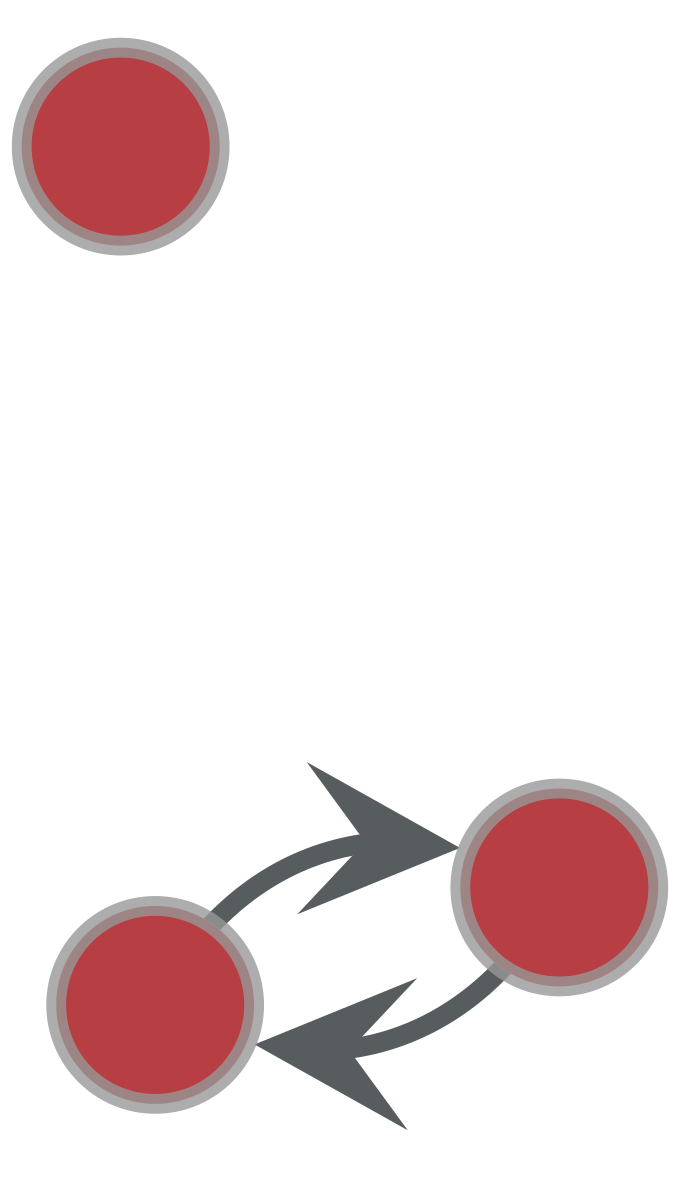

In [5]:
pos = gt.graph_draw(g)

What is the output of the function `gt.graph_draw`?

Run the cell which draws the graph again, only this time get the positions of the draw in a variable `pos`.

Now, draw again the graph but use a non-positional argument called `vertex_text` equal to `g.degree_property_map('in')`, what happens?

Use the same positions using the non-positional argument `pos` equal to `pos`.

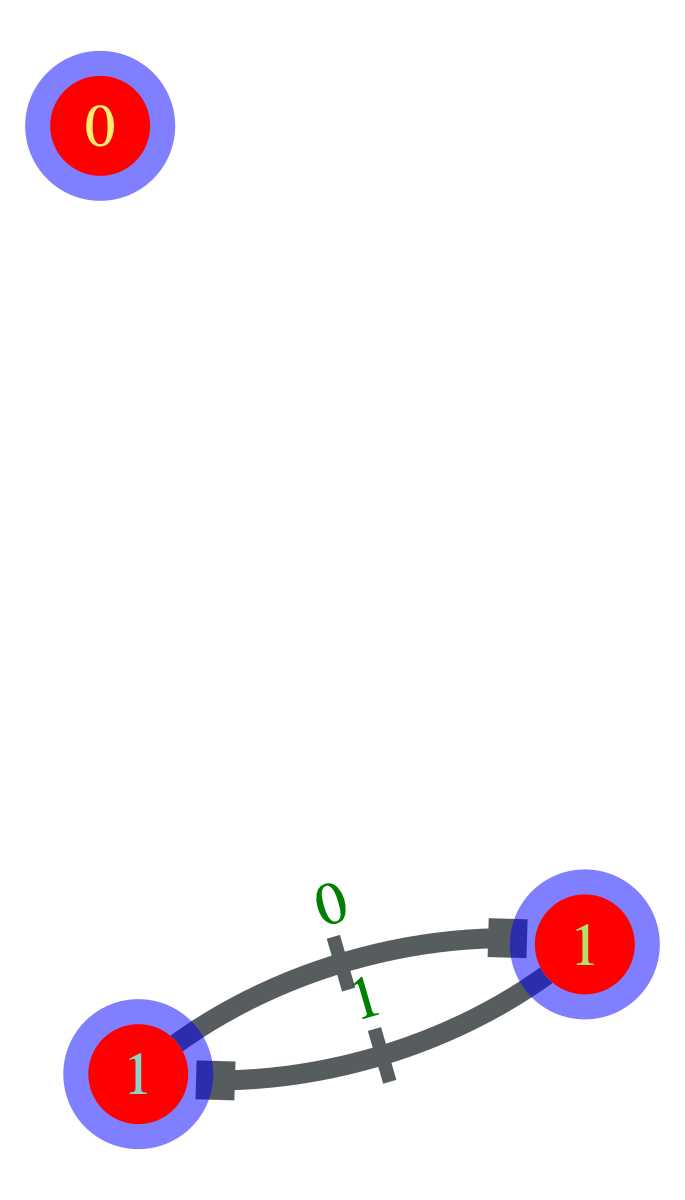

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9f146015b0, at 0x7f9f14c5f430>

In [67]:
gt.graph_draw(g,
              vertex_text=g.degree_property_map('in'),
              vertex_shape="circle",
              vertex_fill_color='red',
              vertex_color="green",
              vertex_size=50,
              vertex_halo=True,
              vertex_text_color=g.vertex_index,
              vertex_pen_width=0,
              edge_pen_width=10,
              edge_end_marker='square',
              edge_mid_marker='bar',
              edge_text=g.edge_index,
              edge_text_color='green',
              pos=pos)

## Import graph from collections

Let's work with some preprocessed graphs. The information of graphs in the [Netzschleuder](https://networks.skewed.de/) repository can be printed with `gt.collection.ns_info`.

1. Call the function `gt.collection.ns_info` to obtain info about the options. This can take a while to load. We are going to work with the `dolphins` graph so call the function as `gt.collection.ns_info['dolphins']`.
2. Create a graph `g` with the `dolphins` graph using `gt.collection.ns['dolphins']`.
3. Create a variable `pos` with the positions of the nodes using spring-block layout `gt.sfdp_layout`.
4. Draw the graph using the non-positional arguments `vertex_text=g.vertex_index` and `pos=pos`.
5. Create a variable `deg` with the degrees of the nodes using `gt.degree_property_map('out')`.
6. The attribute `deg.a` contains the values (in this case the degrees) of the vertex property `deg`. Transform this array to `deg.a = deg.a * 4` so that values can be used better to draw.
7. Draw the graph again using also the non-position argument `vertex_size=deg`. Get the node with the largest degree just by looking at the graph drawing.

In [82]:
gt.collection.ns_info['dolphins']

{'title': 'Dolphin social network (1994-2001)',
 'description': 'An undirected social network of frequent associations observed among 62 dolphins (Tursiops) in a community living off Doubtful Sound, New Zealand, from 1994-2001.[^icon]\n[^icon]: Description obtained from the [ICON](https://icon.colorado.edu) project.',
 'citation': [['D. Lusseau et al., "The bottlenose dolphin community of Doubtful Sound features a large proportion of long-lasting associations." Behavioral Ecology and Sociobiology 54(4), 396-405 (2003).',
   'https://doi.org/10.1007/s00265-003-0651-y']],
 'bibtex': ['@article{Lusseau_2003,\n\tdoi = {10.1007/s00265-003-0651-y},\n\turl = {https://doi.org/10.1007%2Fs00265-003-0651-y},\n\tyear = 2003,\n\tmonth = {sep},\n\tpublisher = {Springer Science and Business Media {LLC}},\n\tvolume = {54},\n\tnumber = {4},\n\tpages = {396--405},\n\tauthor = {David Lusseau and Karsten Schneider and Oliver J. Boisseau and Patti Haase and Elisabeth Slooten and Steve M. Dawson},\n\ttitle 

In [84]:
g = gt.collection.ns["dolphins"]

In [95]:
pos = gt.sfdp_layout(g)

In [125]:
deg = g.degree_property_map('out')

deg.a = deg.a * 4

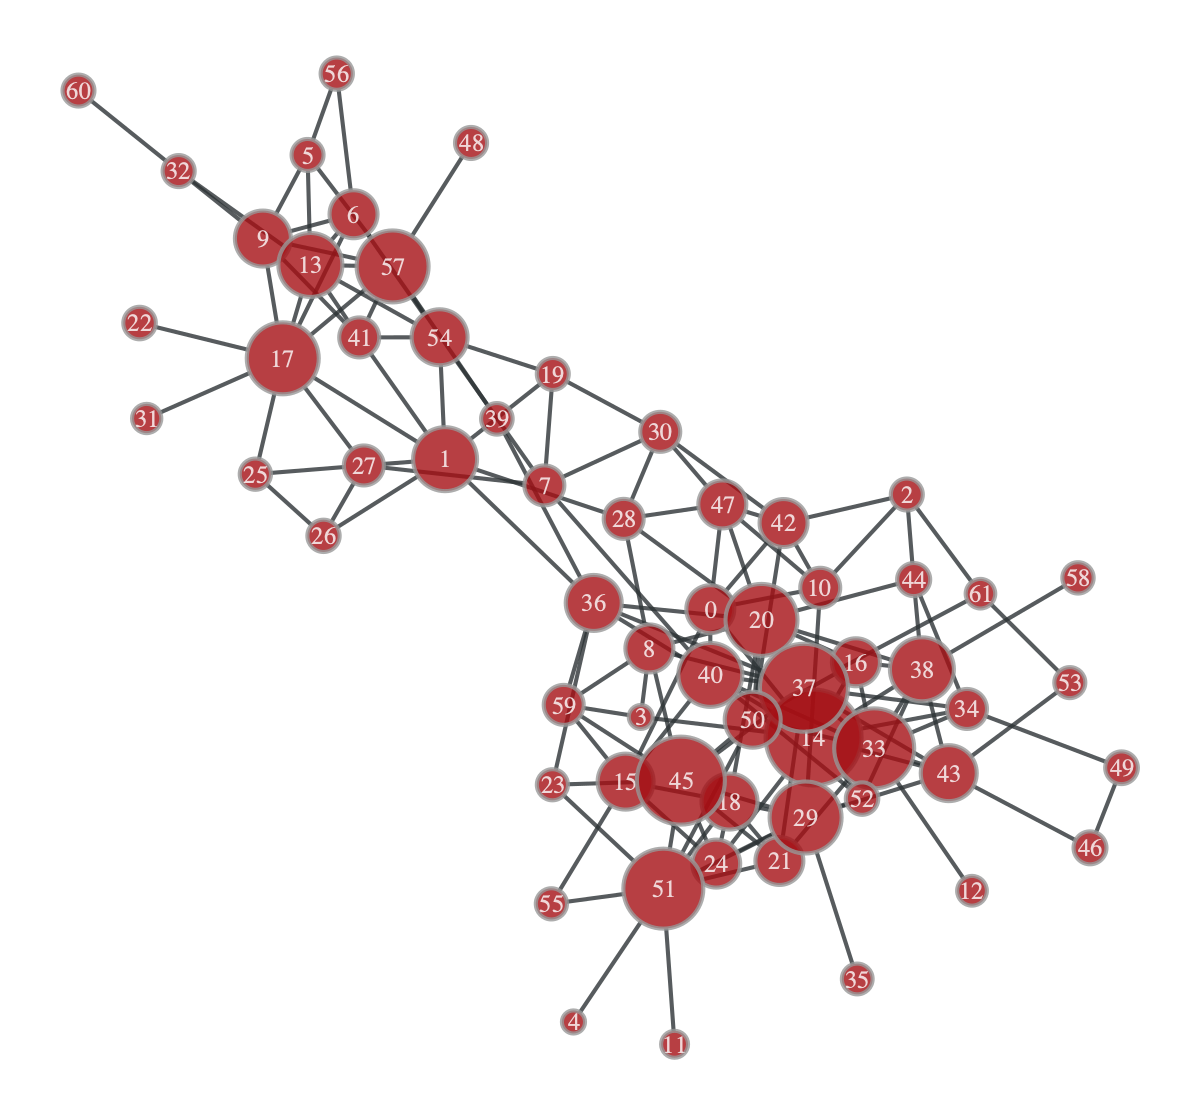

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9f14c4ecd0, at 0x7f9ecd508490>

In [126]:
gt.graph_draw(g,
              pos=pos,
              vertex_text=g.vertex_index,
              vertex_size=deg)

## Graph filtering

Sometimes it's practical tu work with a subnetwork. In this case, we will take the main core of the dolphins graph and make a filter to ignore all other vertices. To read on what is the k-core of a graph here is [a link](https://en.wikipedia.org/wiki/Degeneracy_(graph_theory)).

1. Get the kcore decomposition of our graph `g` in a variable `kcore` using `gt.kcore_decomposition`.
2. Now `kcore` is a variable containing a `gt.VertexPropertyMap`, use it to draw the graph with `vertex_text=kcore`. Use the same other parameters as in the previous drawing.
3. For a better visualization add the non-positional parameter `vertex_fill_color=kcore`.
4. Create a new vertex property of `g` called `main_core` of type `bool` with `g.new_vp('bool')`.
5. Let's transform the array of `main_core` (accessible with `main_core.a`) to be True if that particular node has `kcore=max(k)` and False otherwise with `main_core.a = kcore.a == max(kcore.a)`. Print `main_core.a` to see the changes.
6. Let's filter the graph `g` to contain only the main core with `g.set_vertex_filter(main_core)`. Draw `g` with the same parameters to see the filtered graph.
7. To go back to the original graph `g` set the vertex filter to `None` with `g.set_vertex_filter(None)`.

In [158]:
kcore = gt.kcore_decomposition(g)

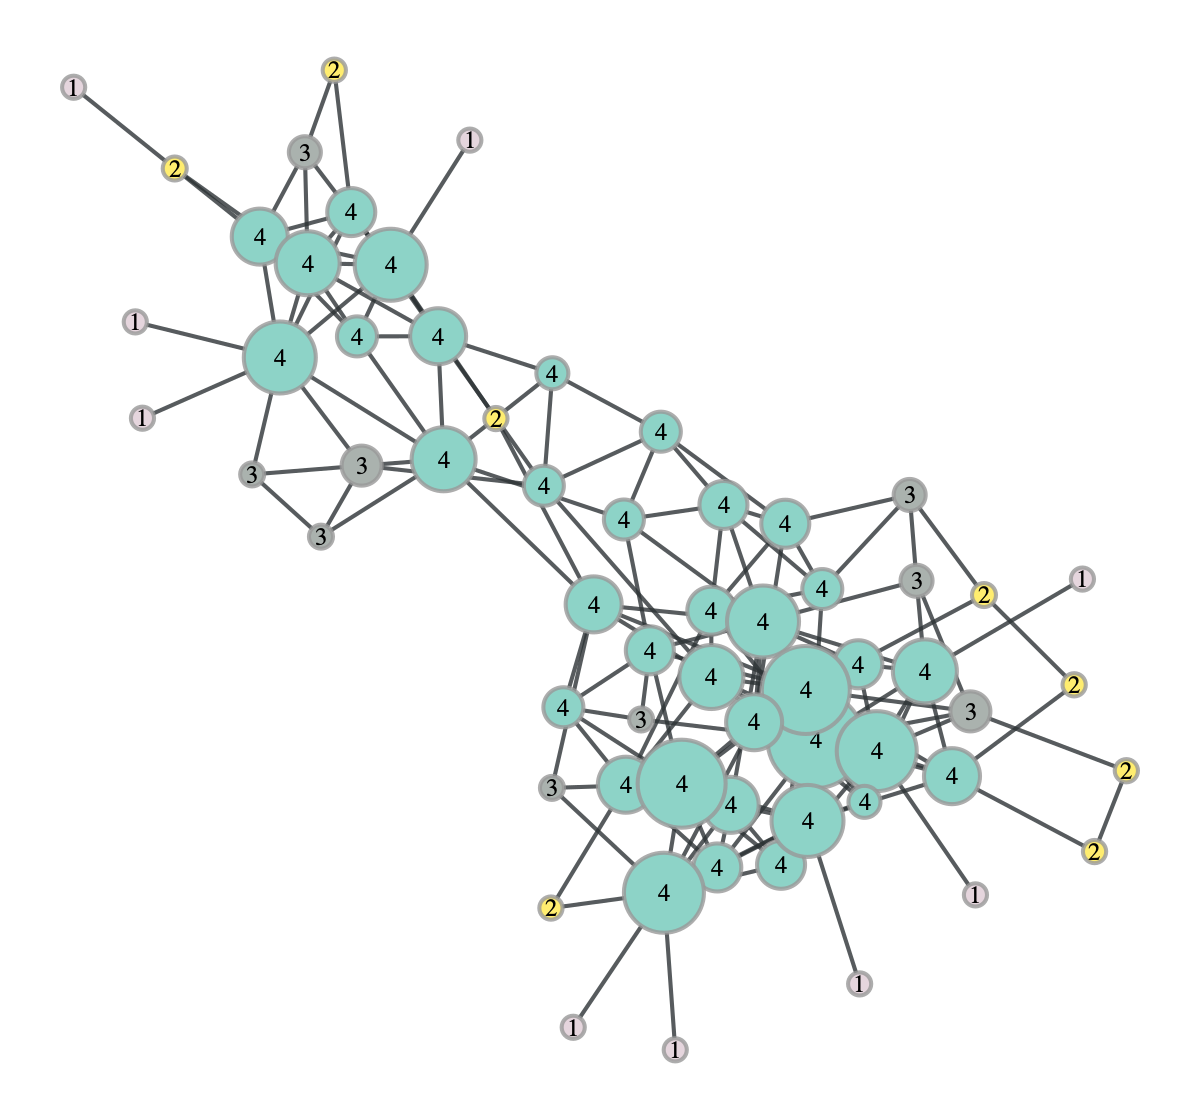

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9f14c4ecd0, at 0x7f9ecd508490>

In [141]:
gt.graph_draw(g,
              pos=pos,
              vertex_text=kcore,
              vertex_size=deg,
              vertex_fill_color=kcore)

In [164]:
g.set_vertex_filter?

In [159]:
main_core = g.new_vp('bool')
main_core.a = kcore.a == max(kcore.a)

In [162]:
g.set_vertex_filter(main_core)

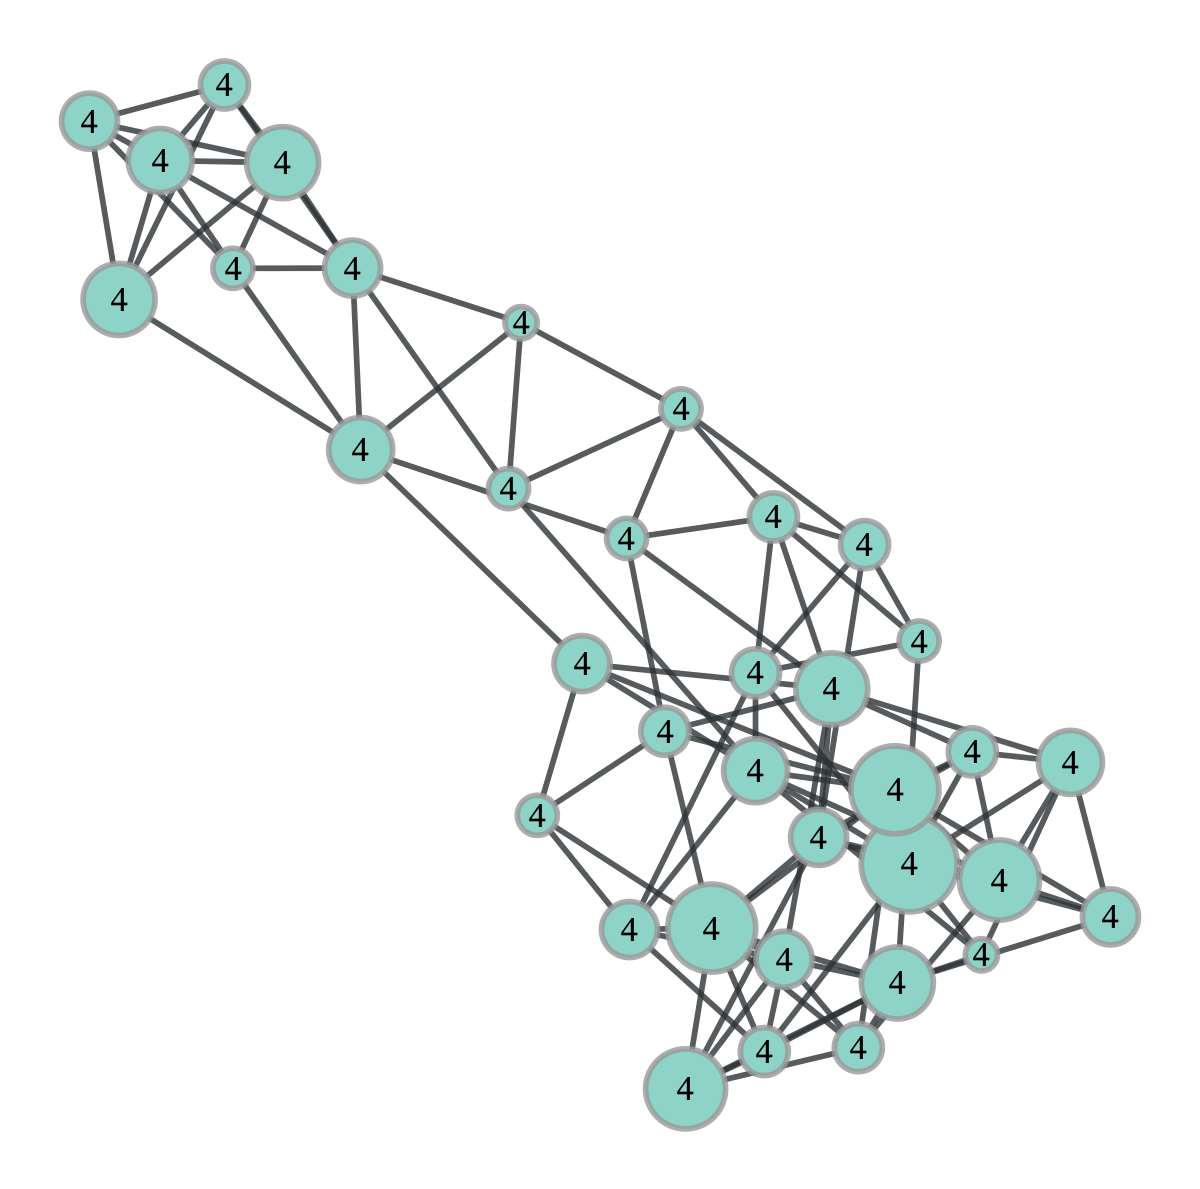

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f9f14c4ecd0, at 0x7f9ecd508490>

In [163]:
gt.graph_draw(g,
              pos=pos,
              vertex_text=kcore,
              vertex_size=deg,
              vertex_fill_color=kcore)